# House Prices - Advanced Regression Techniques

## House Prices Prediction Project

### Introduction
This project uses the Kaggle House Prices dataset to predict home sale prices.
The goal is to demonstrate skills in data cleaning, exploratory analysis,
feature engineering, and machine learning modeling.


In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [8]:
# Load the data
train = pd.read_csv("train.csv")

In [10]:
train.shape

(1460, 81)

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


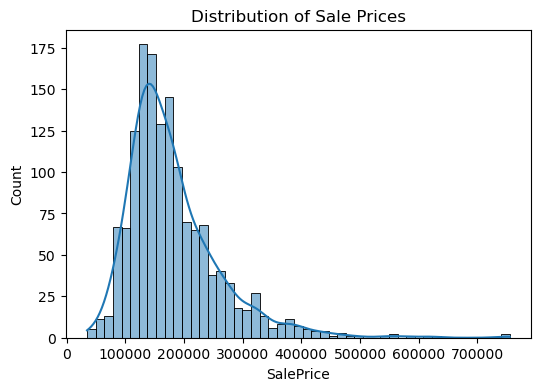

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of Sale Prices")
plt.show()

In [28]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [32]:
# Select only numeric columns
numeric = train.select_dtypes(include=['int64', 'float64'])

In [36]:
# Correlation with SalePrice
corr = numeric.corr()['SalePrice'].sort_values(ascending=False)
corr.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

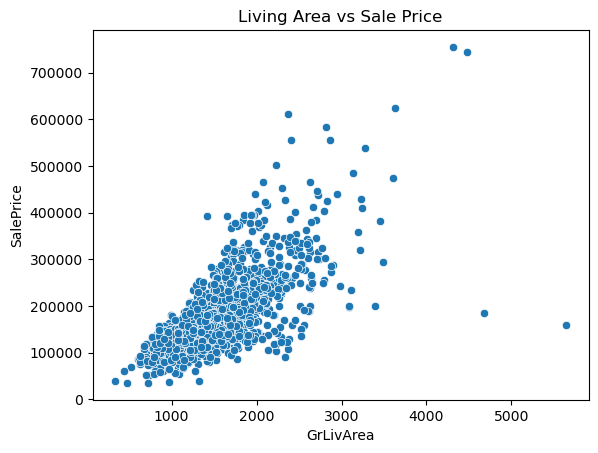

In [38]:
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title("Living Area vs Sale Price")
plt.show()

## Data Cleaning & Preparation

In [42]:
from sklearn.impute import SimpleImputer

#fill numeric columns with median because it's less senstitive to outliers
num_imputer = SimpleImputer(strategy='median')

#fill categorical columns mode
cat_imputer = SimpleImputer(strategy='most_frequent')

In [44]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoder setup
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate numeric and categorical features
numeric_features = train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = train.select_dtypes(exclude=['int64','float64']).columns.tolist()
numeric_features.remove('SalePrice')  # target column

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine into one transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [48]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['SalePrice'])  # features
y = train['SalePrice']                 # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Modelling: Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Build pipeline: preprocessing + model
lin_model = Pipeline(steps=[
    ('preprocessor', preprocessor),   # cleaning + encoding
    ('model', LinearRegression())     # linear regression
])

# Fit model
lin_model.fit(X_train, y_train)

# Predict on test set
y_pred_lin = lin_model.predict(X_test)


In [53]:
# Evaluate the model
# Predict unseen data
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R²:", r2_lin)


Linear Regression RMSE: 29477.00482523242
Linear Regression R²: 0.886720096382261


In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,   # number of trees
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)


Random Forest RMSE: 28480.77943628507
Random Forest R²: 0.8942476792527724


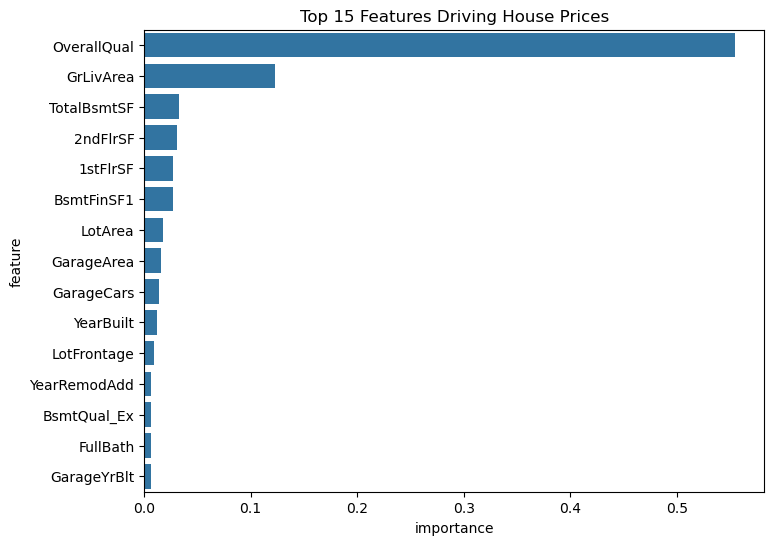

In [57]:
# Get feature importance from Random Forest
rf = rf_model.named_steps['model']
importances = rf.feature_importances_

# Get feature names after preprocessing
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_names)

# Put into DataFrame
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values('importance', ascending=False).head(15)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title("Top 15 Features Driving House Prices")
plt.show()


## Results & Insights
- Random Forest performed better than Linear Regression (lower RMSE, higher R²).
- Key drivers of house prices: OverallQual, GrLivArea, GarageCars, TotalBsmtSF, YearBuilt.
- Handling missing values and encoding categorical features were essential steps.


## Conclusion
This project demonstrates my ability to:
- Explore and clean real-world data
- Build preprocessing pipelines
- Train and evaluate machine learning models
- Communicate insights with visuals

Next steps could include hyperparameter tuning, more feature engineering, and model stacking.
